# Basic Text Analysis

In [1]:
import pandas
from string import ascii_lowercase
from nltk.corpus import stopwords
from collections import Counter
import seaborn
from symspellpy.symspellpy import SymSpell

In [ ]:
# maximum edit distance per dictionary precalculation
max_edit_distance_dictionary = 0
prefix_length = 7
# create object
sym_spell = SymSpell(max_edit_distance_dictionary, prefix_length)
# load dictionary
dictionary_path = os.path.join(os.path.dirname(__file__),
                               "frequency_dictionary_en_82_765.txt")
term_index = 0
count_index = 1
if not sym_spell.load_dictionary(dictionary_path, term_index, count_index):
    print("Dictionary file not found")
input_term = "thequickbrownfoxjumpsoverthelazydog"
result = sym_spell.word_segmentation(input_term)
print("{}, {}, {}".format(result.corrected_string, result.distance_sum,
                          result.log_prob_sum))


In [2]:
seaborn.set(rc={'figure.figsize':(18, 14)})
seaborn.set(style='whitegrid',
           font_scale=1.7)

top = 20

## Helper Functions

In [3]:
allowed = ascii_lowercase + ' '
print(allowed)

abcdefghijklmnopqrstuvwxyz 


In [4]:
def clean_sentence(sentence):
    new = [char for char in sentence if char in allowed]
    return ''.join(new)

In [5]:
def return_sets(sentence, words_per_set):
    
    offset = words_per_set - 1
    words = sentence.split()
    length = len(words)

    if length >= words_per_set:
        words = [' '.join([words[index] for index in range(x, x + words_per_set)]) for x in range(0, length - offset)]
        unique_words = list(set(words))
        return unique_words

In [6]:
return_sets('This is a sample sentence, to test the return_sets() function. Ha Ha Ha Ha', words_per_set=2)

['the return_sets()',
 'Ha Ha',
 'return_sets() function.',
 'is a',
 'test the',
 'This is',
 'function. Ha',
 'to test',
 'sample sentence,',
 'a sample',
 'sentence, to']

In [7]:
return_sets('This is a sample sentence, to test the return_sets() function.', words_per_set=4)

['sentence, to test the',
 'This is a sample',
 'sample sentence, to test',
 'test the return_sets() function.',
 'is a sample sentence,',
 'a sample sentence, to',
 'to test the return_sets()']

In [8]:
stopwords = stopwords.words('english')

def clean_stopwords(sentence):
    
    cleaned = ' '.join([word for word in sentence.split() if word not in stopwords])
    
    return cleaned

In [9]:
def visualize_counter(counter_object, colour='black'):
    frame = pandas.DataFrame(counter_object)
    frame.columns = ['word', 'count']

    chart = seaborn.barplot(data=frame, y='word', x='count', color=colour)
    return chart

## Import dataset (google company reviews)

In [10]:
data = pandas.read_csv('./employee_reviews.csv')

In [11]:
# Check the dimensions
data.shape

(23486, 11)

In [12]:
data.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


## Preprocess
- Convert to lowercase
- Remove chars not in `allowed`
- Remove stop words

In [12]:
# Strip and convert to lower case
data['cons-lower'] = data['cons'].str.lower().str.strip()
data['pros-lower'] = data['pros'].str.lower().str.strip()

In [13]:
# Preview 
data['cons-lower'][:5]

0                   bureaucracy is slowing things down
1    1) work/life balance. what balance? all those ...
2    * it *is* becoming larger, and with it comes g...
3    i live in sf so the commute can take between 1...
4    if you don't work in mtv (hq), you will be giv...
Name: cons-lower, dtype: object

In [14]:
# Remove unwanted chars
data['cons-lower-clean'] = data['cons-lower'].apply(clean_sentence)
data['pros-lower-clean'] = data['pros-lower'].apply(clean_sentence)

In [15]:
# Remove stop words
data['cons-lower-clean-final'] = data['cons-lower-clean'].apply(clean_stopwords)
data['pros-lower-clean-final'] = data['pros-lower-clean'].apply(clean_stopwords)

## Cons analysis

### Singles

In [16]:
cons_sentences = list(data['cons-lower-clean-final'])
print(cons_sentences[0])

bureaucracy slowing things


In [17]:
cons_sentence_items = [item.split() for item in cons_sentences]
print(cons_sentence_items[0])

['bureaucracy', 'slowing', 'things']


In [18]:
cons_items_flat_list = [item for sublist in cons_sentence_items for item in sublist]

In [19]:
# Show total items (words) from the cons feature
len(cons_items_flat_list)

1111853

In [20]:
# Show unique items, along with counts
counter = Counter(cons_items_flat_list)

In [21]:
# Show top
single_counter = counter.most_common(top)

for item in single_counter:
    print(item)

('work', 21443)
('company', 11363)
('get', 10592)
('people', 10466)
('management', 10352)
('time', 8617)
('hours', 6963)
('much', 6171)
('dont', 6066)
('like', 6007)
('employees', 5961)
('many', 5747)
('job', 5709)
('balance', 5706)
('managers', 5588)
('hard', 5588)
('working', 5357)
('good', 5307)
('long', 5257)
('lot', 5146)


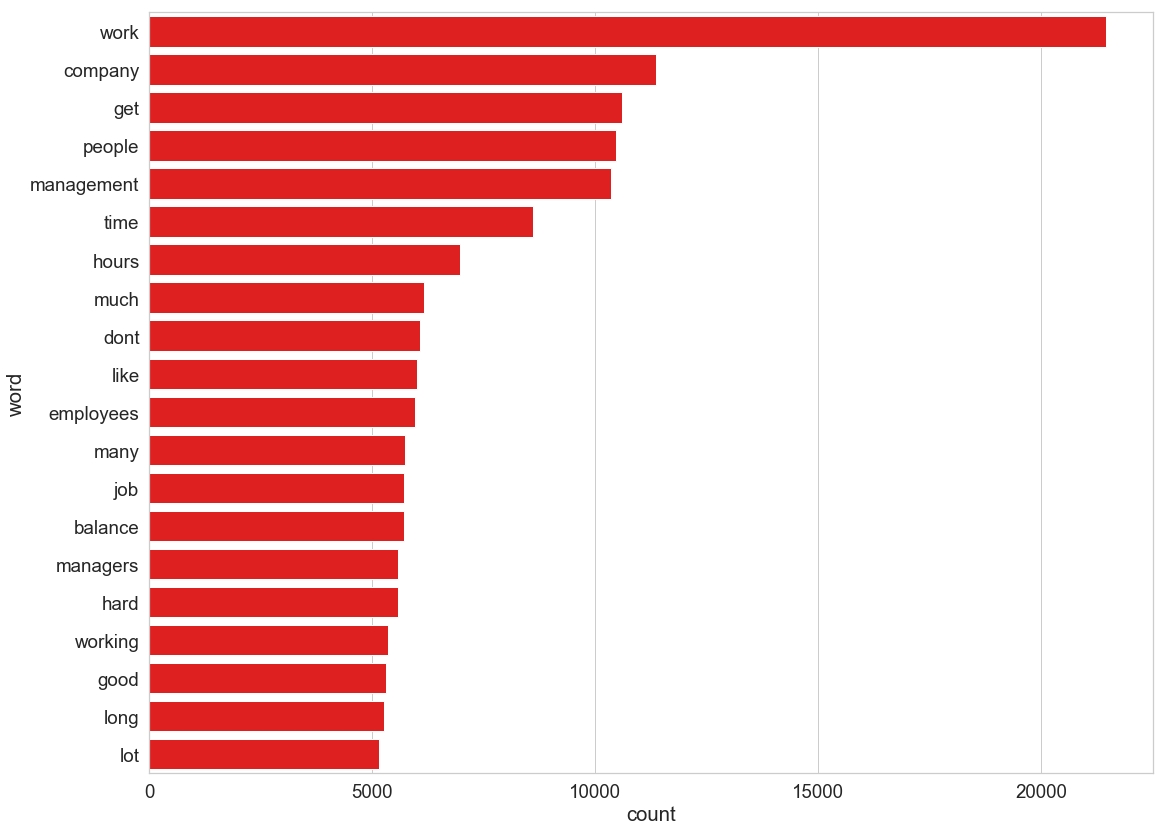

In [22]:
visualize_counter(single_counter, colour='red')

### Pairs

In [23]:
data['cons-pairings'] = data['cons-lower-clean'].apply(return_sets, args=(2,))

In [24]:
print(data['cons-lower-clean'][0])
print(data['cons-pairings'][0])

bureaucracy is slowing things down
['bureaucracy is', 'is slowing', 'slowing things', 'things down']


In [25]:
cons_pairs_flat_list = []
for item in data['cons-pairings']:
    if item:
        cons_pairs_flat_list += item

In [26]:
len(cons_pairs_flat_list)

1967701

In [27]:
cons_pairs_flat_list[:10]

['bureaucracy is',
 'is slowing',
 'slowing things',
 'things down',
 'worklife balance',
 'balance what',
 'what balance',
 'balance all',
 'all those',
 'those perks']

In [28]:
pair_counter = Counter(cons_pairs_flat_list)

In [29]:
pair_counts = pair_counter.most_common(top)

for item in pair_counts:
    print(item)

('if you', 6513)
('of the', 6401)
('in the', 6047)
('can be', 5731)
('to be', 5571)
('the company', 5044)
('you are', 5008)
('a lot', 4594)
('lot of', 4124)
('to work', 4065)
('is a', 3840)
('to get', 3836)
('it is', 3491)
('is not', 3451)
('there is', 3396)
('have to', 3183)
('hard to', 2985)
('you have', 2973)
('to the', 2966)
('life balance', 2961)


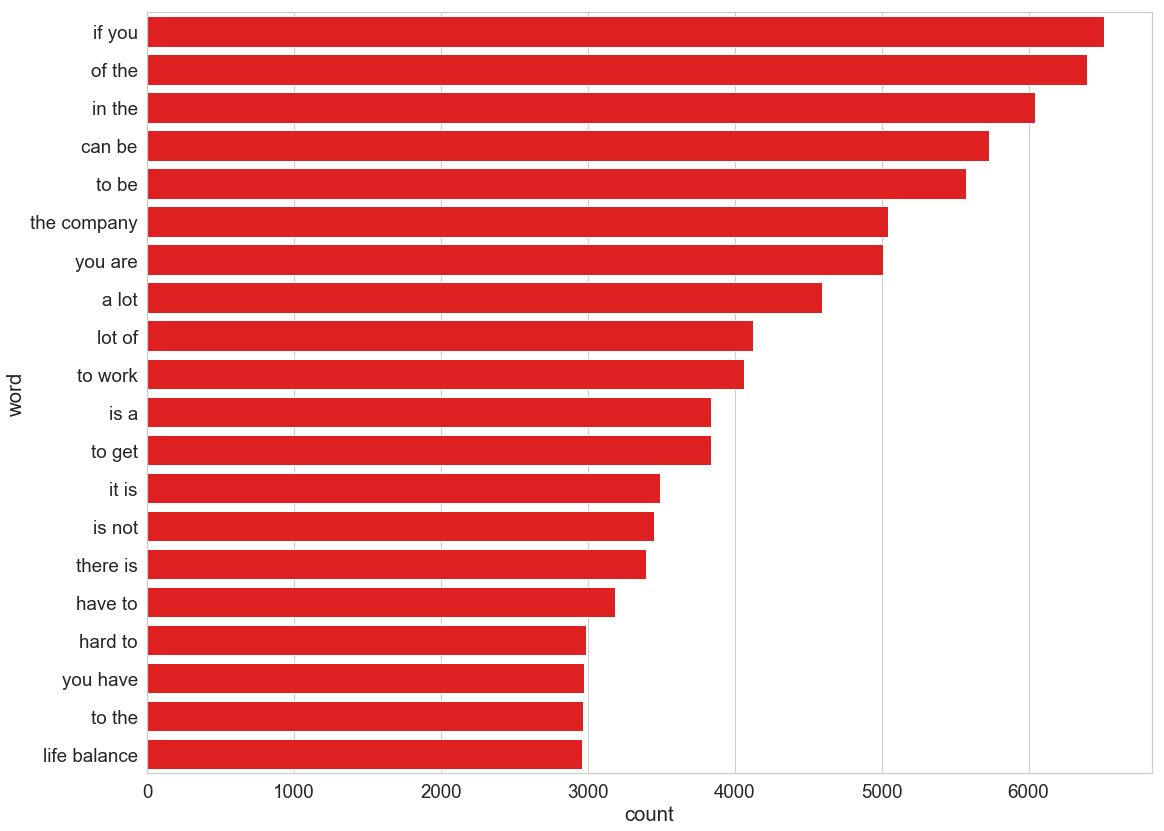

In [30]:
visualize_counter(pair_counts, colour='red')

### Triplets

In [31]:
data['cons-triplets'] = data['cons-lower-clean'].apply(return_sets, args=(3,))

In [32]:
print(data['cons-lower-clean'][0])
print(data['cons-triplets'][0])

bureaucracy is slowing things down
['bureaucracy is slowing', 'is slowing things', 'slowing things down']


In [33]:
cons_triplets_flat_list = []
for item in data['cons-triplets']:
    if item:
        cons_triplets_flat_list += item

In [34]:
len(cons_triplets_flat_list)

1900186

In [35]:
cons_triplets_flat_list[:10]

['bureaucracy is slowing',
 'is slowing things',
 'slowing things down',
 'worklife balance what',
 'balance what balance',
 'what balance all',
 'balance all those',
 'all those perks',
 'those perks and',
 'perks and benefits']

In [36]:
triplets_counter = Counter(cons_triplets_flat_list)

In [37]:
triplet_counts = triplets_counter.most_common(top)

for item in triplet_counts:
    print(item)

('a lot of', 3647)
('work life balance', 2796)
('you have to', 1644)
('if you are', 1634)
('there is a', 889)
('you need to', 867)
('there is no', 839)
('the company is', 804)
('can be a', 760)
('you will be', 744)
('if you dont', 723)
('to move up', 718)
('it can be', 710)
('you want to', 668)
('of the company', 606)
('in the company', 576)
('some of the', 566)
('if you want', 557)
('hard to get', 552)
('it is a', 545)


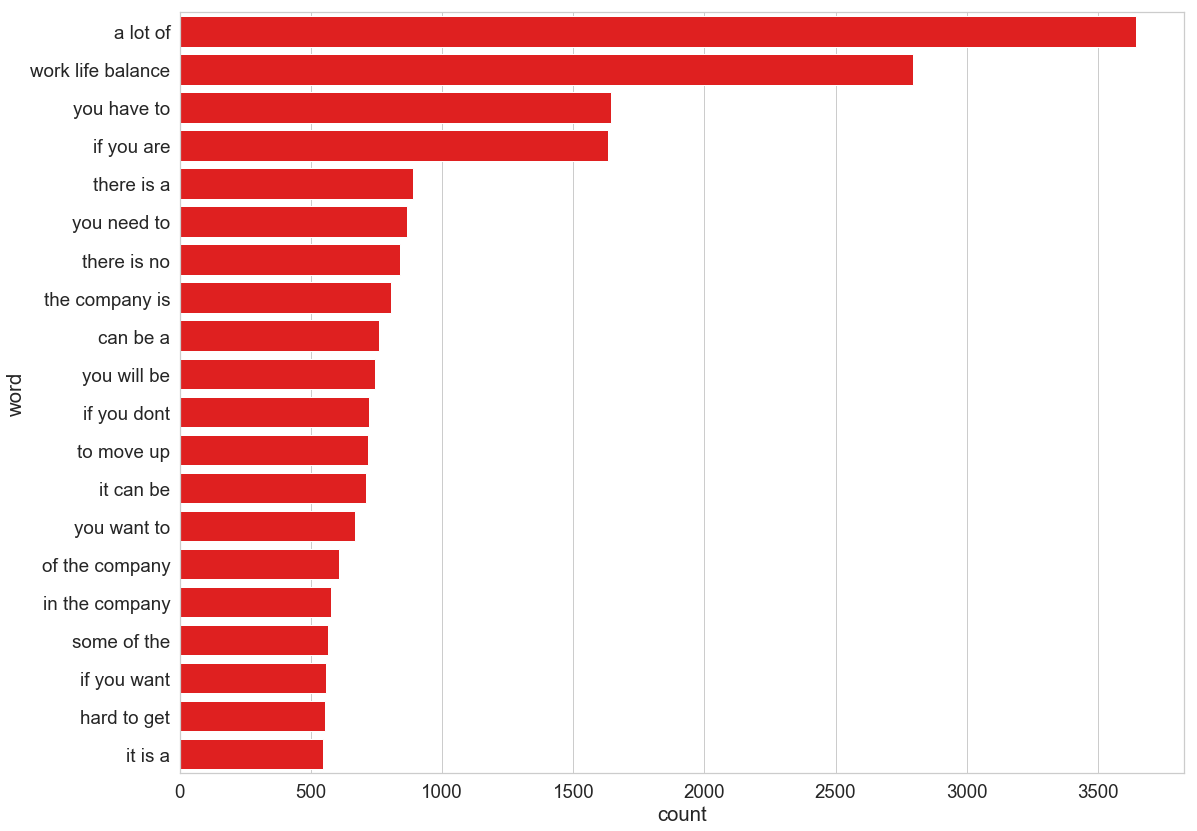

In [38]:
visualize_counter(triplet_counts, colour='red')

### Quadruples

In [39]:
data['cons-quads'] = data['cons-lower-clean'].apply(return_sets, args=(4,))

In [40]:
print(data['cons-lower-clean'][0])
print(data['cons-quads'][0])

bureaucracy is slowing things down
['bureaucracy is slowing things', 'is slowing things down']


In [41]:
cons_quads_flat_list = []
for item in data['cons-quads']:
    if item:
        cons_quads_flat_list += item

In [42]:
len(cons_quads_flat_list)

1832679

In [43]:
cons_quads_flat_list[:10]

['bureaucracy is slowing things',
 'is slowing things down',
 'worklife balance what balance',
 'balance what balance all',
 'what balance all those',
 'balance all those perks',
 'all those perks and',
 'those perks and benefits',
 'perks and benefits are',
 'and benefits are an']

In [44]:
quads_counter = Counter(cons_quads_flat_list)

In [45]:
quadruple_counts = quads_counter.most_common(top)

for item in quadruple_counts:
    print(item)

('no work life balance', 514)
('work life balance is', 485)
('i can think of', 445)
('if you want to', 427)
('if you are not', 334)
('you have to be', 303)
('not a lot of', 283)
('that i can think', 271)
('when it comes to', 270)
('is a lot of', 260)
('there is a lot', 254)
('hard to move up', 225)
('if you have a', 222)
('you need to be', 216)
('if you are a', 213)
('a lot of people', 200)
('to get things done', 200)
('at the end of', 199)
('the end of the', 194)
('can be hard to', 191)


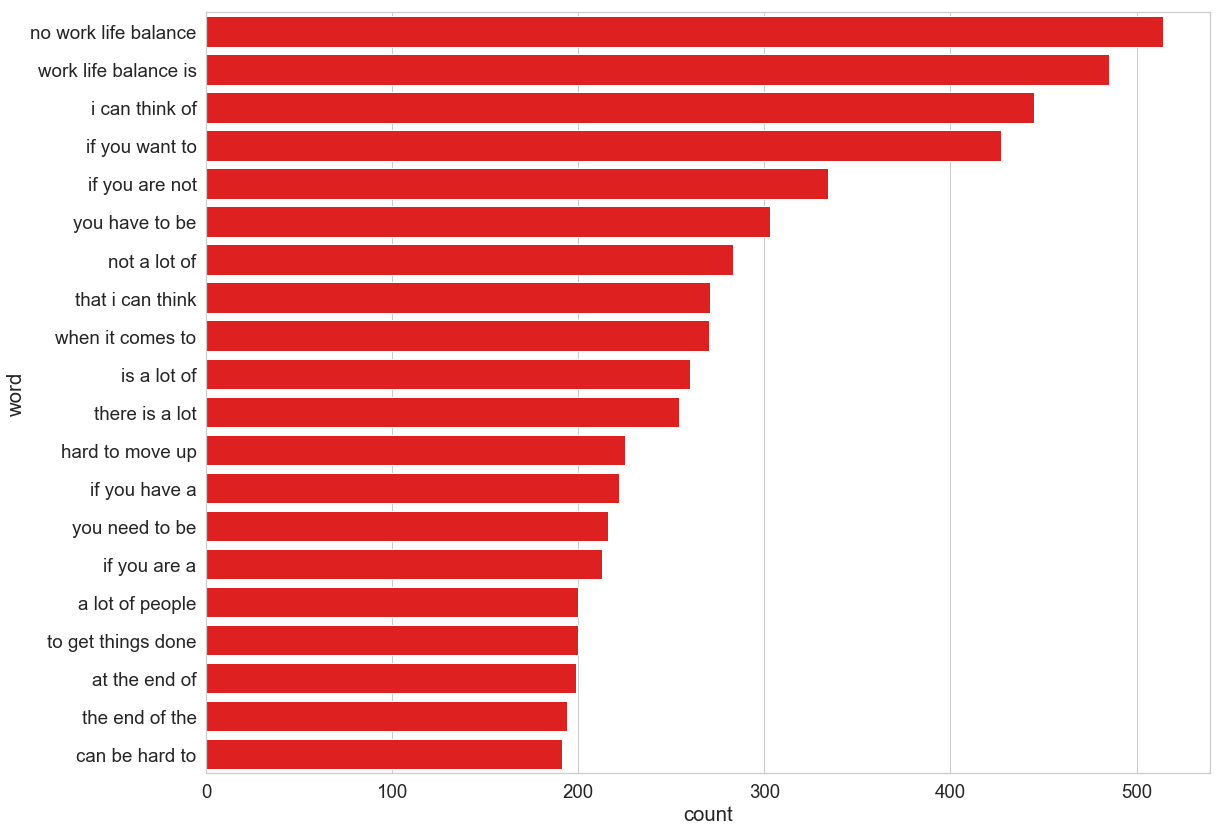

In [46]:
visualize_counter(quadruple_counts, colour='red')

## Pros analysis

### Singles

In [47]:
pros_sentences = list(data['pros-lower-clean-final'])
print(pros_sentences[0])

people smart friendly


In [48]:
pros_sentence_items = [item.split() for item in pros_sentences]
print(pros_sentence_items[0])

['people', 'smart', 'friendly']


In [49]:
pros_items_flat_list = [item for sublist in pros_sentence_items for item in sublist]

In [50]:
# Show total items (words) from the cons feature
len(pros_items_flat_list)

863287

In [51]:
# Show unique items, along with counts
counter = Counter(pros_items_flat_list)

In [52]:
# Show top
single_pros_counter = counter.most_common(top)

for item in single_pros_counter:
    print(item)

('work', 30355)
('great', 27759)
('good', 22496)
('people', 18364)
('benefits', 16424)
('company', 13063)
('pay', 8330)
('environment', 8221)
('working', 6612)
('culture', 6556)
('smart', 6324)
('get', 6143)
('opportunities', 5882)
('place', 5423)
('lot', 5350)
('time', 4799)
('learn', 4770)
('lots', 4757)
('best', 4705)
('job', 4488)


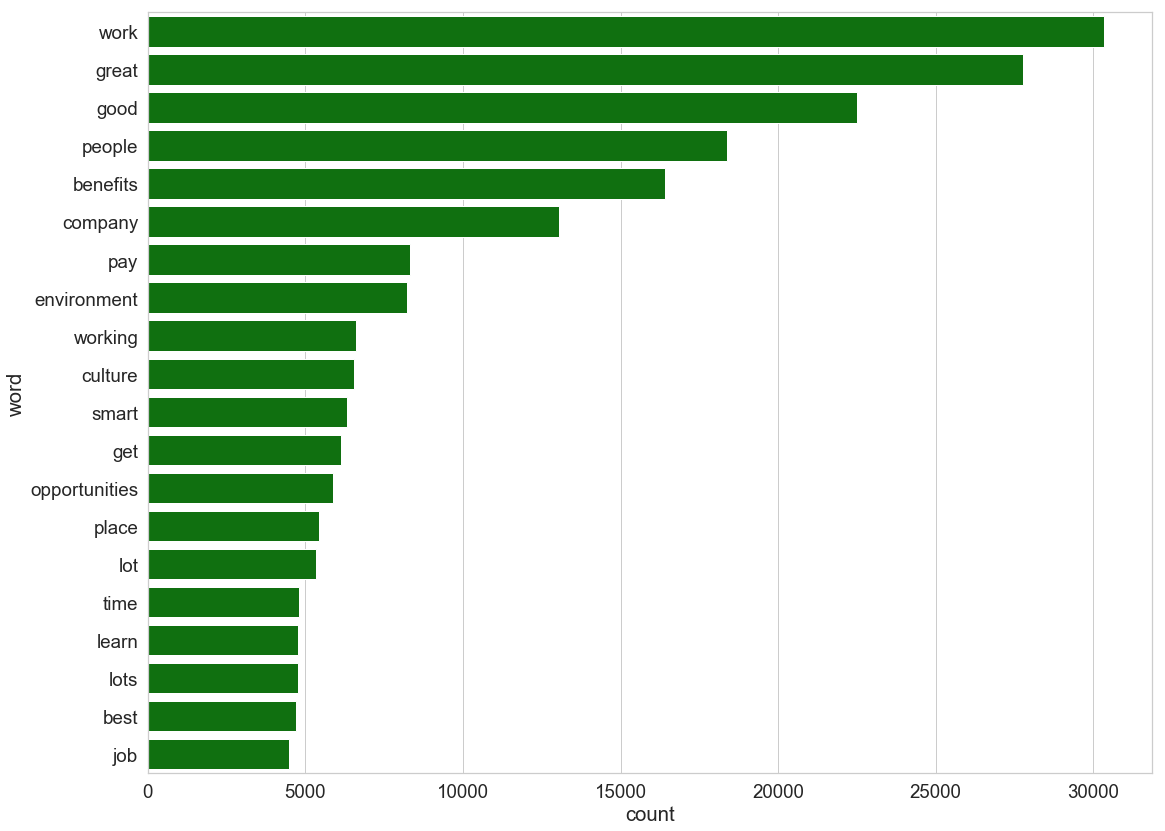

In [53]:
visualize_counter(single_pros_counter, colour='green')

### Pairs

In [54]:
data['pros-pairings'] = data['pros-lower-clean'].apply(return_sets, args=(2,))

In [55]:
print(data['pros-lower-clean'][0])
print(data['pros-pairings'][0])

people are smart and friendly
['people are', 'are smart', 'smart and', 'and friendly']


In [56]:
pros_pairs_flat_list = []
for item in data['pros-pairings']:
    if item:
        pros_pairs_flat_list += item

In [57]:
len(pros_pairs_flat_list)

1351721

In [58]:
pros_pairs_flat_list[:10]

['people are',
 'are smart',
 'smart and',
 'and friendly',
 'food food',
 'food food',
 'food cafes',
 'cafes on',
 'on main',
 'main campus']

In [59]:
pros_pair_counter = Counter(pros_pairs_flat_list)

In [60]:
pros_pair_counts = pros_pair_counter.most_common(top)

for item in pros_pair_counts:
    print(item)

('to work', 11134)
('work with', 4766)
('of the', 4757)
('a lot', 4667)
('lots of', 4579)
('in the', 4328)
('if you', 4126)
('the company', 4019)
('great benefits', 3870)
('place to', 3728)
('smart people', 3718)
('lot of', 3701)
('you can', 3321)
('is a', 3058)
('the best', 2802)
('you are', 2655)
('to be', 2643)
('to learn', 2631)
('a great', 2403)
('and the', 2244)


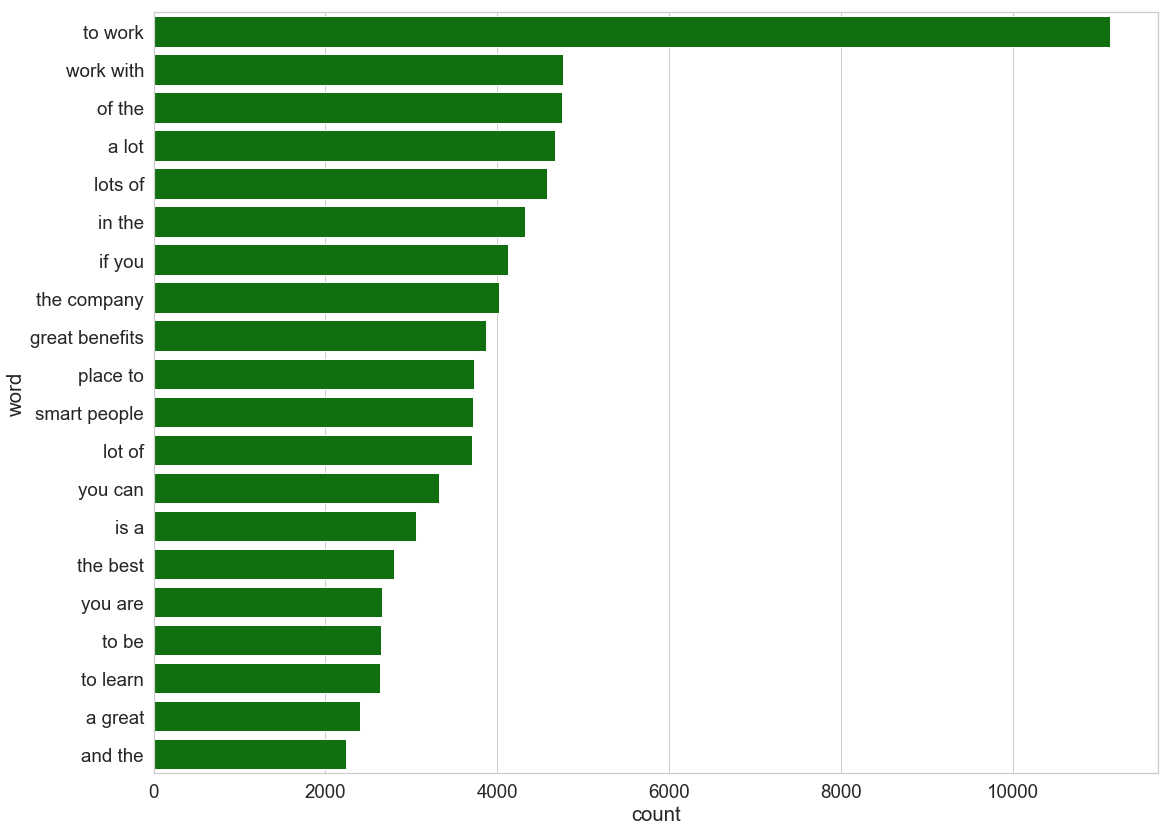

In [61]:
visualize_counter(pros_pair_counts, colour='green')

### Triplets

In [62]:
data['pros-triplets'] = data['pros-lower-clean'].apply(return_sets, args=(3,))

In [63]:
print(data['pros-lower-clean'][0])
print(data['pros-triplets'][0])

people are smart and friendly
['people are smart', 'are smart and', 'smart and friendly']


In [64]:
pros_triplets_flat_list = []
for item in data['pros-triplets']:
    if item:
        pros_triplets_flat_list += item

In [65]:
len(pros_triplets_flat_list)

1284194

In [66]:
pros_triplets_flat_list[:10]

['people are smart',
 'are smart and',
 'smart and friendly',
 'food food food',
 'food food cafes',
 'food cafes on',
 'cafes on main',
 'on main campus',
 'main campus mtv',
 'campus mtv alone']

In [67]:
pros_triplets_counter = Counter(pros_triplets_flat_list)

In [68]:
pros_triplet_counts = pros_triplets_counter.most_common(top)

for item in pros_triplet_counts:
    print(item)

('a lot of', 3092)
('to work with', 2994)
('place to work', 2457)
('work life balance', 1869)
('to work on', 1493)
('great place to', 1491)
('to work for', 1365)
('some of the', 1168)
('people to work', 1056)
('company to work', 1052)
('if you are', 1011)
('you get to', 897)
('learn a lot', 868)
('get to work', 860)
('one of the', 847)
('work from home', 844)
('of the best', 809)
('in the world', 706)
('is a great', 686)
('great benefits and', 671)


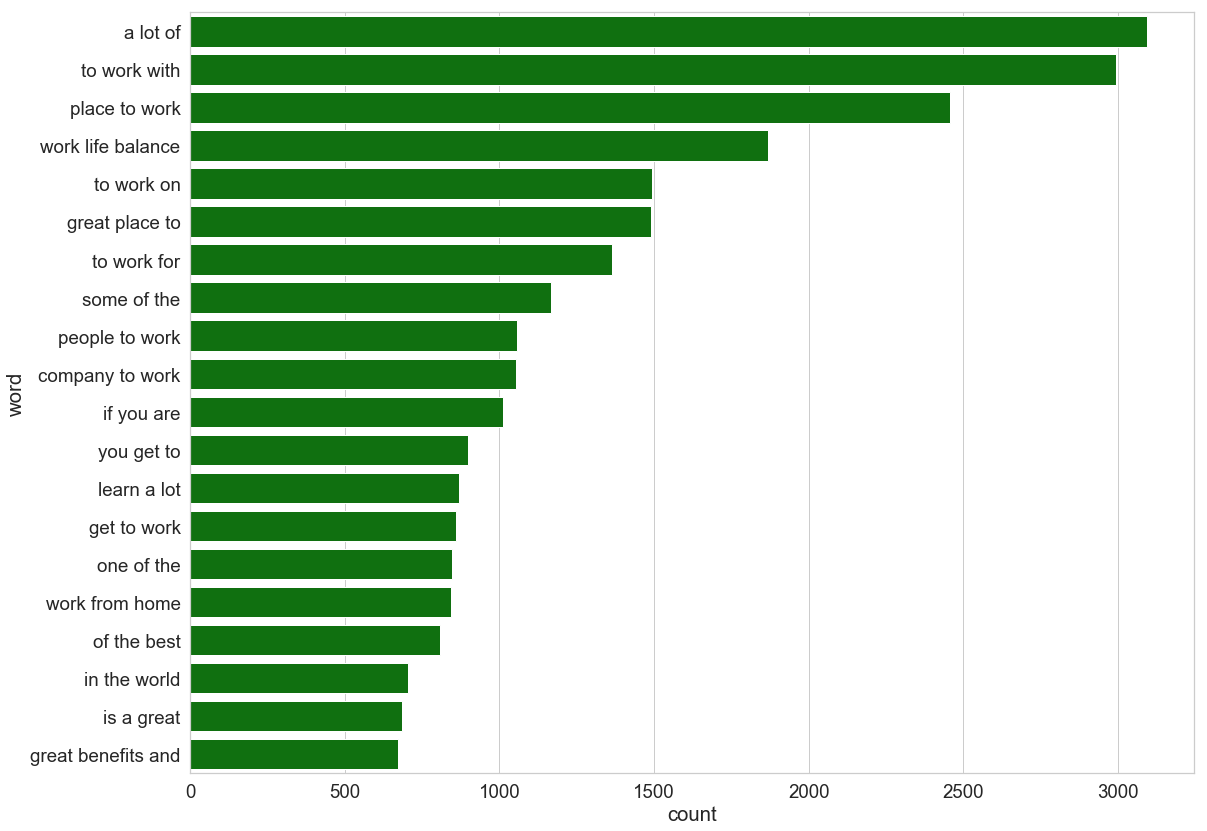

In [69]:
visualize_counter(pros_triplet_counts, colour='green')

### Quadruples

In [70]:
data['pros-quads'] = data['pros-lower-clean'].apply(return_sets, args=(4,))

In [71]:
print(data['pros-lower-clean'][0])
print(data['pros-quads'][0])

people are smart and friendly
['people are smart and', 'are smart and friendly']


In [72]:
pros_quads_flat_list = []
for item in data['pros-quads']:
    if item:
        pros_quads_flat_list += item

In [73]:
len(pros_quads_flat_list)

1216675

In [74]:
pros_quads_flat_list[:10]

['people are smart and',
 'are smart and friendly',
 'food food food cafes',
 'food food cafes on',
 'food cafes on main',
 'cafes on main campus',
 'on main campus mtv',
 'main campus mtv alone',
 'campus mtv alone minikitchens',
 'mtv alone minikitchens snacks']

In [75]:
pros_quads_counter = Counter(pros_quads_flat_list)

In [76]:
pros_quadruple_counts = pros_quads_counter.most_common(top)

for item in pros_quadruple_counts:
    print(item)

('people to work with', 985)
('great place to work', 937)
('company to work for', 772)
('a great place to', 545)
('good work life balance', 494)
('get to work with', 462)
('great company to work', 462)
('you get to work', 443)
('one of the best', 414)
('with some of the', 381)
('great people to work', 342)
('some of the best', 328)
('good place to work', 321)
('if you want to', 307)
('is a great place', 293)
('with a lot of', 283)
('some of the smartest', 280)
('get to work on', 257)
('as long as you', 251)
('work with some of', 241)


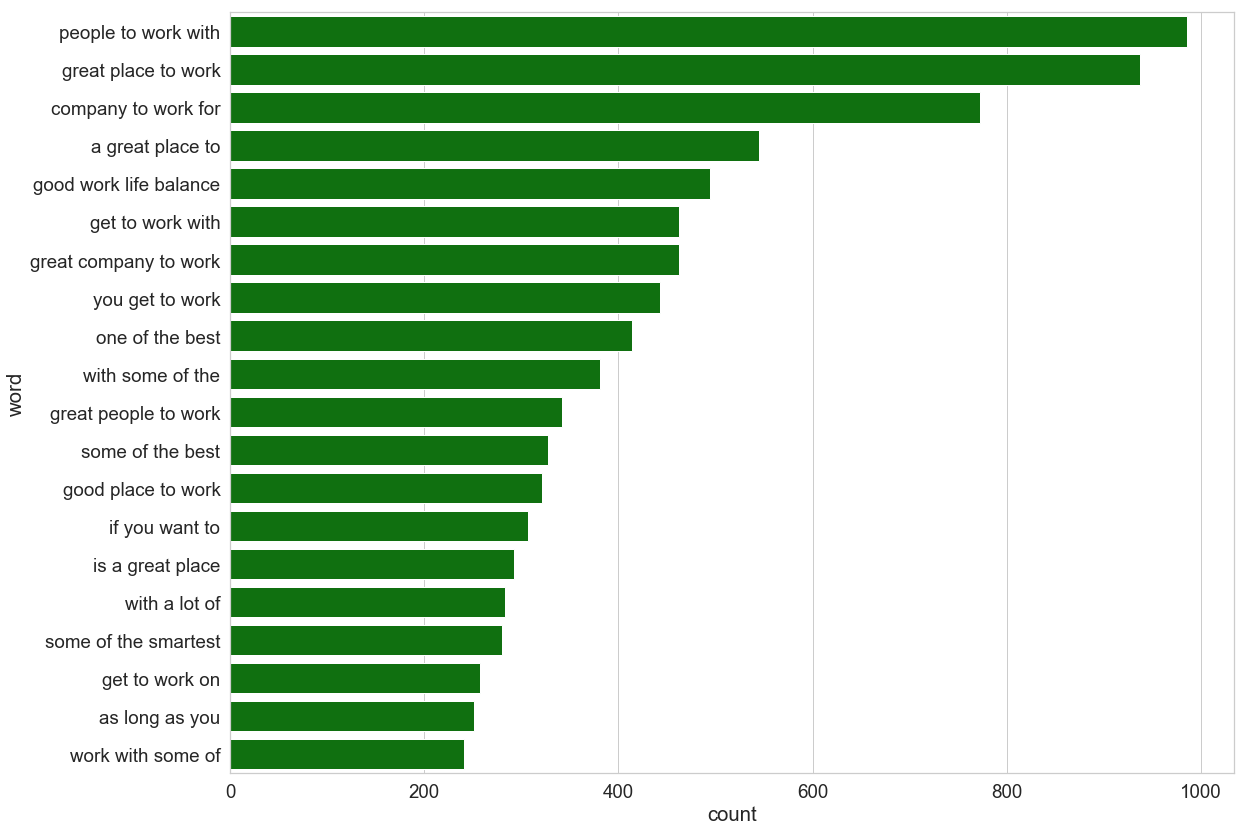

In [77]:
visualize_counter(pros_quadruple_counts, colour='green')

### Tests
- test with `cons` Series, on `6 words per set`.

In [163]:
data['test'] = data['cons-lower-clean'].apply(return_sets, args=(4,))

In [164]:
test_flat_list = []
for item in data['test']:
    if item:
        unique_item = list(set(item))
        test_flat_list += unique_item

In [165]:
len(test_flat_list)

1829587

In [166]:
test_flat_list[:10]

['bureaucracy is slowing things',
 'is slowing things down',
 'ill because of stress',
 'at work and they',
 'patience ive heard stories',
 'to develop emotional intelligence',
 'over family colleagues getting',
 'into so there is',
 'other path to grow',
 'these are the people']

In [167]:
test_counter = Counter(test_flat_list)

In [168]:
test_counter_subset = test_counter.most_common(top)

for item in test_counter_subset:
    print(item)

('no work life balance', 512)
('work life balance is', 483)
('i can think of', 442)
('if you want to', 411)
('if you are not', 326)
('you have to be', 297)
('not a lot of', 278)
('that i can think', 271)
('when it comes to', 260)
('is a lot of', 258)
('there is a lot', 252)
('hard to move up', 225)
('if you have a', 213)
('you need to be', 212)
('a lot of people', 198)
('to get things done', 198)
('if you are a', 196)
('at the end of', 196)
('can be hard to', 190)
('the end of the', 189)


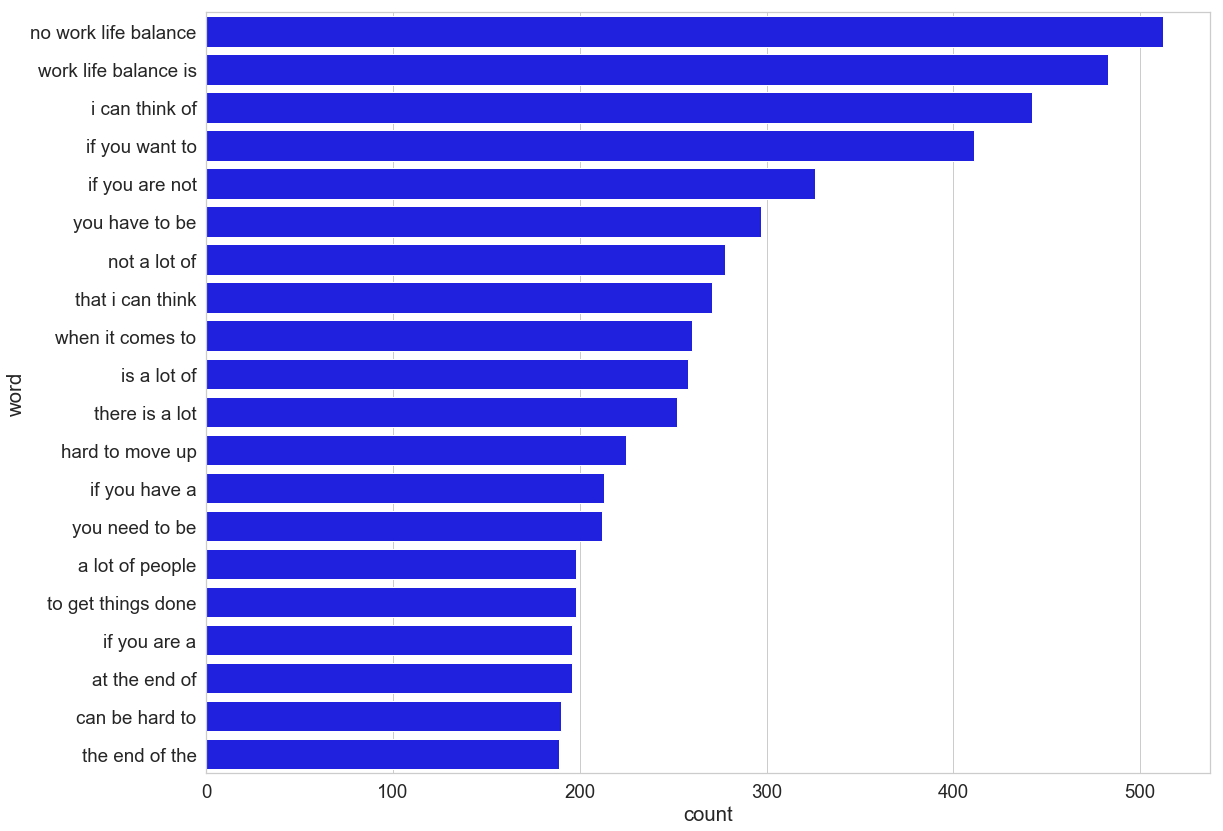

In [169]:
visualize_counter(test_counter_subset, colour='blue')